In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import norm

In [ ]:
#Black-Scholes Pricing model

def BSMPrice(T,s0,mu,sigma,k):
  d1 = (np.log(s0/k)+((mu+(1/2)*(sigma**2))*T))/(sigma*np.sqrt(T))
  d2 = d1 - (sigma*np.sqrt(T))
  Nd1 = norm.cdf(d1)
  Nd2 = norm.cdf(d2)
  c0 = s0*Nd1 - k*np.exp(-mu*T)*Nd2
  return c0

In [ ]:
#Function to generate Regular Brownian Motion
def reg_brownian(T,step):
  t=np.arange(0,T,step)
  values=np.zeros(len(t))
  values[0]=0
  #np.random.seed(s)
  for i in range(len(t)):
    values[i]=values[i-1]+np.random.normal(0,1)
  values=values*math.sqrt(step)
  return values

In [ ]:
#Function to generate Geometric Brownian motion
def geo_brownian(s0,mu,sigma,T,steps):
  t=np.arange(0,T,steps)
  w2=reg_brownian(T,steps)     #Taking brownian values
  w=w2[-1]*sigma
  y=mu-(sigma*sigma)/2
  x=s0*math.exp(y*t[-1]+w)
  ans=x
  return ans

In [ ]:
#generating monte-carlo for Geometric Brownian motion

def monte_carlo(s0,mu,sigma,T,N,k):
  steps=T/N
  no_of_sim=10000
  arr=np.zeros(no_of_sim)
  for i in range(no_of_sim):
    arr[i]=geo_brownian(s0,mu,sigma,T,steps)
  for i in range(len(arr)):
    arr[i]=max(0,arr[i]-k)
  return np.array(arr)

In [ ]:
def generateRandoms(total_days,mu,sigma,N):
  ret = []
  for i in range(total_days):
    temp = np.random.normal((mu-(1/2)*(sigma**2))*(1/N),sigma/np.sqrt(N))
    ret.append(temp)
  return ret

In [ ]:
def sumOfdownInAndDownOut(randoms,s0,total_days,mu,sigma,N,v,k):
  sd = np.zeros(total_days+1)
  sd[0]=s0
  for i in range(total_days):
    sd[i+1]=sd[i]*np.exp(randoms[i])
  I = 0
  for i in range(len(sd)):
    if sd[i]<v:
      I=1
      break
  downInValue = (np.exp((-mu*total_days)/N))*I*max(0,sd[len(sd)-1]-k)
  downOutValue = (np.exp((-mu*total_days)/N))*(1-I)*max(0,sd[len(sd)-1]-k)
  return (downInValue+downOutValue)

In [ ]:
def finalMonteCarlo(s0,T,mu,sigma,N,k,v):
  itr = 1000
  monteCarlo = []
  anthetic = []
  iterations = []
  steps=T/N
  while itr <= 10000:
    iterations.append(itr)
    y1 = 0
    y2 = 0
    for i in range(itr):
      randoms = generateRandoms(N,mu,sigma,N)
      y1+= sumOfdownInAndDownOut(randoms,s0,N,mu,sigma,N,v,k)
      x2 = geo_brownian(s0,mu,sigma,T,steps)
      y2+=max(0,x2-k)
    y1 = y1/itr
    y2 = y2/itr
    #y2=max(0,y2-k)
    monteCarlo.append(y1)
    anthetic.append(y2)
    itr = itr + 1000
  ret = []
  ret.append(monteCarlo)
  ret.append(anthetic)
  ret.append(iterations)
  return ret

The BSM value of the option price is: 7.115627392992909
The Monte-Carlo GBM simulation value of the option price is: 7.468317435802253
The Monte-Carlo Binomial simulation value of the option price is: 7.200269325688507


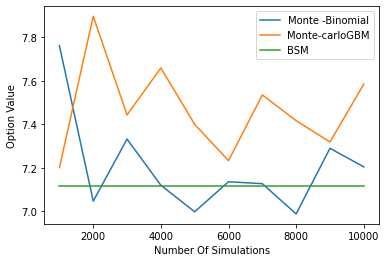

In [ ]:
s0 = 50 
k = 50 
r = 0.05
volatility = 0.3
v = 45
num_trading_days=252
total_days = 252
v=45
T = 1
BSMValue = BSMPrice(T,s0,r,volatility,k)
#monte_gbm=monte_carlo(s0,r,volatility,T,num_trading_days,k)
monteCarloValue = finalMonteCarlo(s0,T,r,volatility,num_trading_days,k,v)
plt.plot(monteCarloValue[2],monteCarloValue[0],label='Monte -Binomial')
plt.plot(monteCarloValue[2],monteCarloValue[1],label='Monte-carloGBM')
bsm=[]
for i in range(len(monteCarloValue[2])):
  bsm.append(BSMValue)
plt.plot(monteCarloValue[2],bsm,label='BSM')
print("The BSM value of the option price is:",BSMValue)
print("The Monte-Carlo GBM simulation value of the option price is:",np.mean(monteCarloValue[1]))
print("The Monte-Carlo Binomial simulation value of the option price is:",np.mean(monteCarloValue[0]))
plt.xlabel('Number Of Simulations')
plt.ylabel('Option Value')
plt.legend()
plt.show()